In [1]:
import pandas as pd
import cv2
import numpy as np
import math

In [2]:
img=cv2.imread('4Junc.png')

In [3]:
cv2.imshow('',img)
cv2.waitKey(0)

-1

In [4]:
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [5]:
def get_dis(x,y,x_c,y_c):
    return np.sqrt(np.square(x-x_c)+np.square(y-y_c))

In [6]:
def get_tan(angle):
    Radians0 = math.radians(angle)
    tan_val = math.tan(Radians0)
    return tan_val

In [7]:
img=image = cv2.rectangle(img,(0,0),(img.shape[1],img.shape[0]),(0,0,0),3)

In [8]:
cv2.imshow('',img)
cv2.waitKey(0)

-1

In [9]:
def rays_spreader(img,x_init,y_init):
    L=[]
    for i in range(360): 
        x=x_init
        y=y_init
        m=get_tan(i)
        # parametric form x+a*cos(theta),y+a*sin(theta)
        count=0
        a=1
        while x>0 and x<img.shape[0] and y<img.shape[1] and y>0:
            if img[x][y]<50:
                l=get_dis(x,y,x_init,y_init)
                break
            x=x_init+a*math.cos(math.radians(i))
            y=y_init+a*math.sin(math.radians(i))
            x=math.floor(x)
            y=math.floor(y)
            a+=1
            count+=1
        L.append(l)
        #print(i,':',count,'l:',l,'------------------------------------------------------------')
            
    return L           
            
            

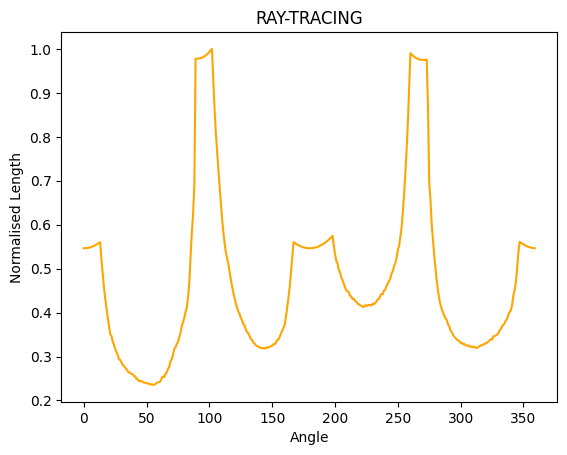

In [10]:
a=rays_spreader(img,int((img.shape[0]*(0.5))),int(img.shape[1]*(0.5)))
k=np.max(a)
b=a/k
import matplotlib.pyplot as plt
plt.plot(b,color='orange')
plt.xlabel('Angle')
plt.ylabel('Normalised Length')
plt.title("RAY-TRACING")
plt.show()